In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd

import scipy
from tabulate import tabulate

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

import warnings
warnings.filterwarnings("ignore")

from data_plotting_func_min_dist import *

filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']


min_dist = 20
max_dist = 200


eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20
saved default


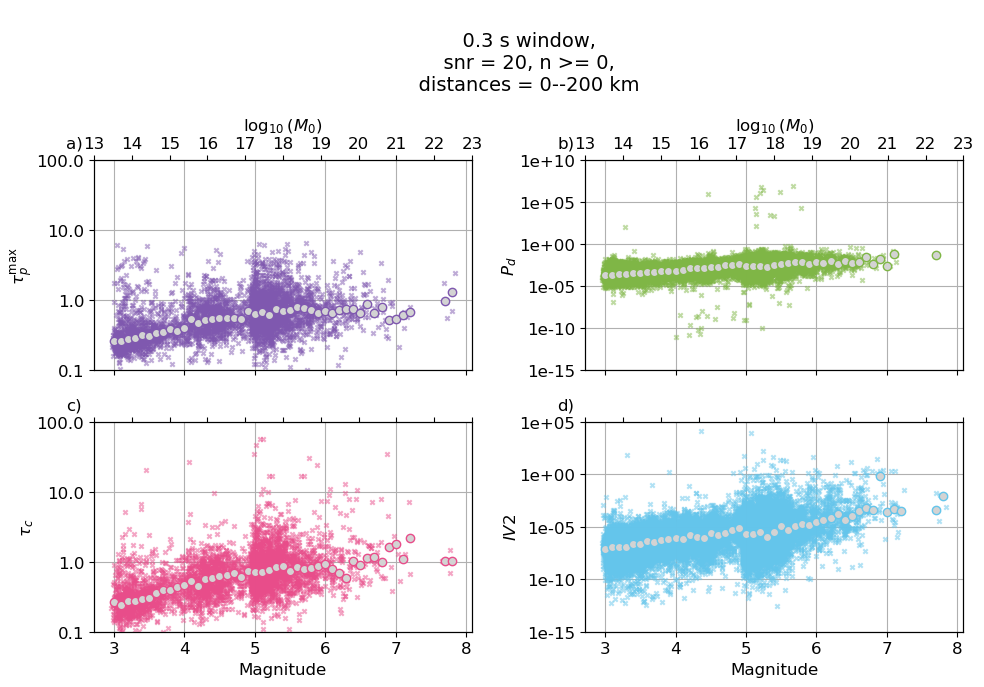

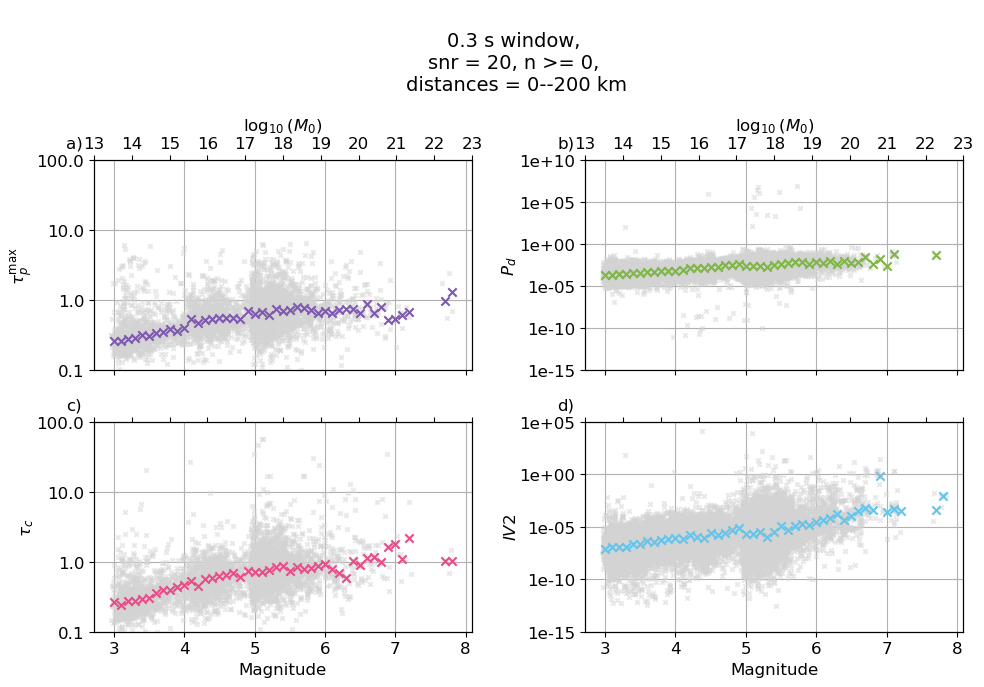

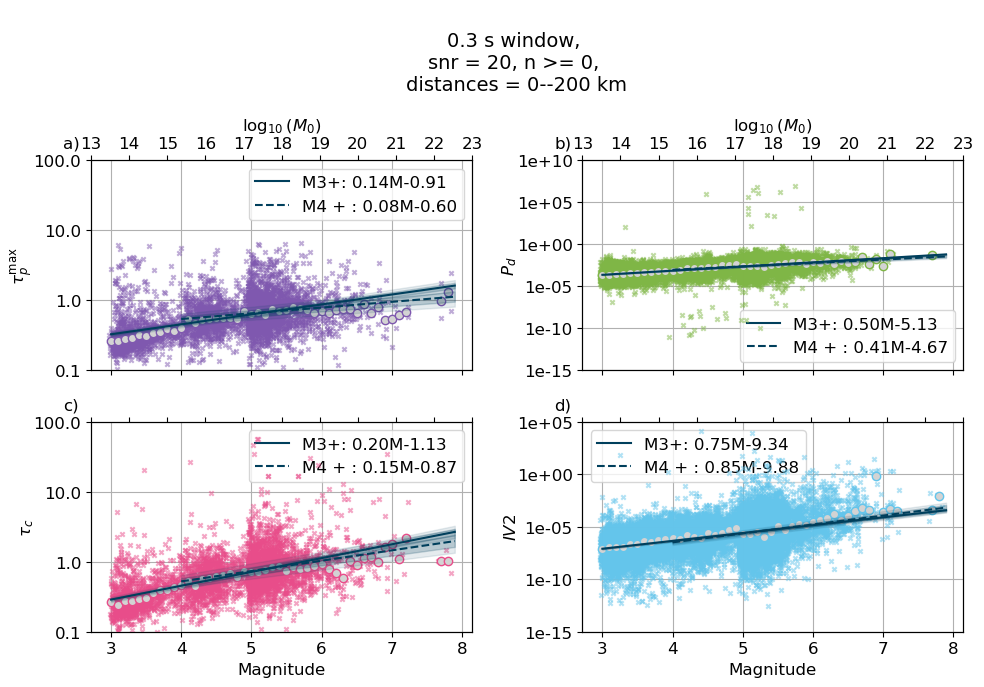

saved default


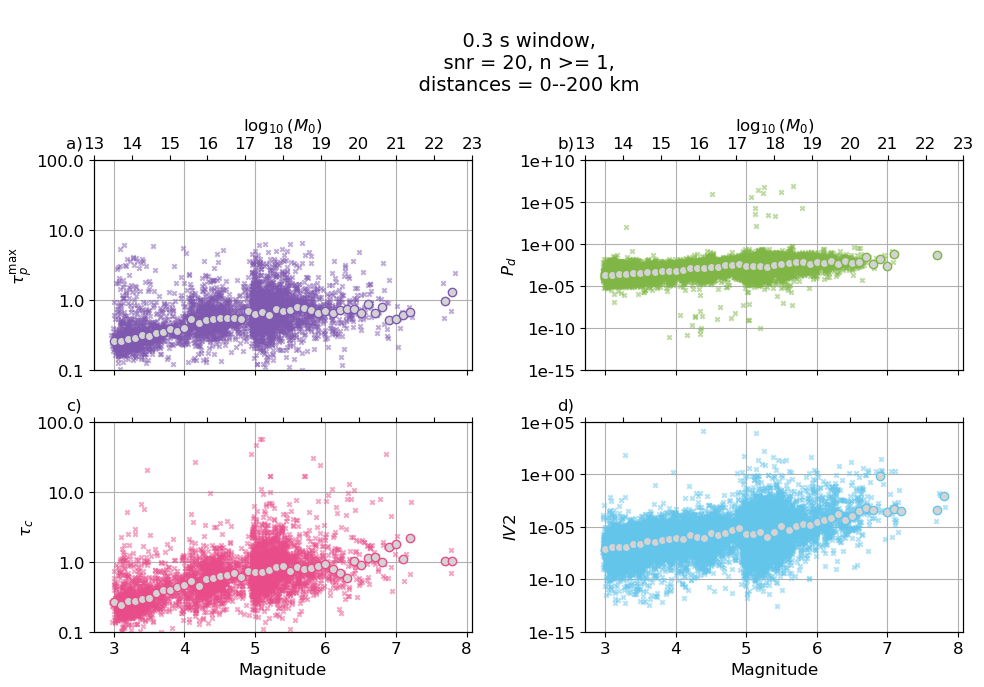

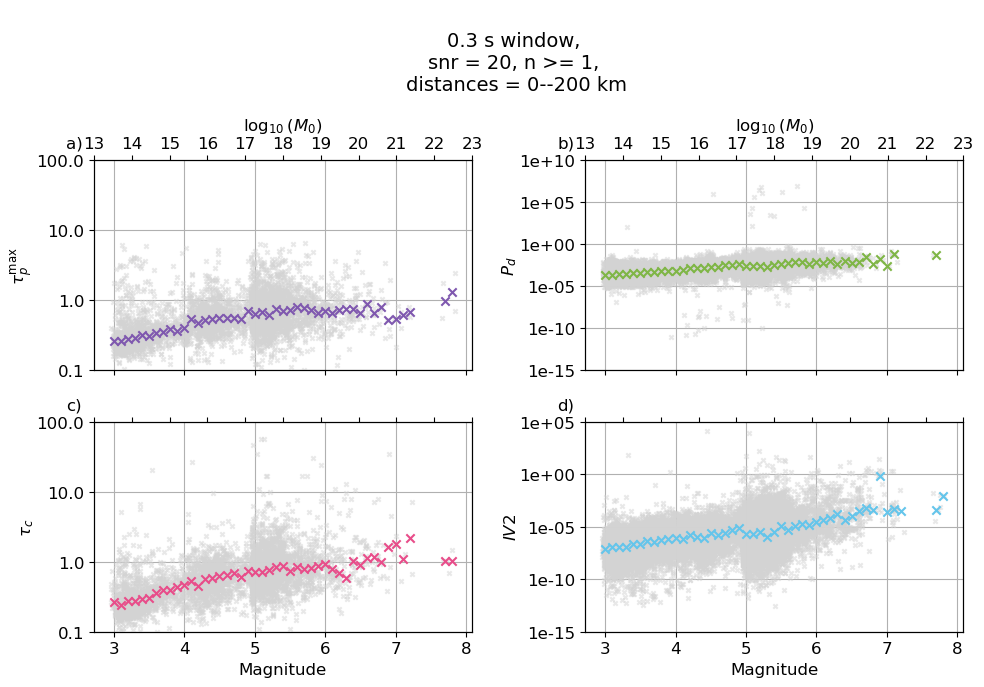

KeyboardInterrupt: 

In [2]:

for f in filenames:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for min_dist in np.arange(0, 51, 10):
        for n_stations in range(0, 6, 1):
            options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
            x_tp, y_tp = calc_tp_mag_lim(df, 3., **options)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3., **options)
            x_tc, y_tc = calc_tc_mag_lim(df, 3., **options)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3., **options)

            plot_data_subplots([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f,n=n_stations, min_dist = min_dist, max_dist = max_dist, save=True)
            plot_data_subplots_grey([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f,n=n_stations, min_dist = min_dist, max_dist = max_dist, save=True)
            
            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []
            for mag_lim in magnitudes:
                x, y = calc_tp_mag_lim(df, mag_lim, **options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
            tp_pearson = pearson

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []
            for mag_lim in magnitudes:
                x, y = calc_pgd_mag_lim(df, mag_lim, **options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
            pgd_pearson = pearson
            pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []
            for mag_lim in magnitudes:
                x, y = calc_tc_mag_lim(df, mag_lim, **options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)  
            tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
            tc_pearson = pearson

            gradt, intercept, gradt_std, intercept_std = [],[],[],[]
            pearson = []
            spearman = []
            spearman_p = []
            n_l = []
            for mag_lim in magnitudes:
                x, y = calc_iv2_mag_lim(df, mag_lim, **options)
                gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
            iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
            iv2_pearson = pearson

            plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, min_dist = min_dist, max_dist = max_dist, save = True, show = True, hyp = True)
